In [1]:
# 01_data_understanding.ipynb

# --- 1. Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlalchemy
import sys
import os

# Add the parent directory (project root) to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from config import SQL_SERVER, SQL_DATABASE

In [2]:
conn_str = "your_connection_string_here"  # <-- Replace with your actual connection string



# Build connection string for Windows Authentication
conn_str = (
    f"mssql+pyodbc://@{SQL_SERVER}/{SQL_DATABASE}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes"
)

import sqlalchemy
engine = sqlalchemy.create_engine(conn_str)
query = """
        SELECT Date, PunchCode as WorkType, Hours, SystemHours, 
		CASE WHEN PunchCode IN (206, 213) THEN NoRows
		ELSE Quantity END as Quantity, 
		SystemKPI
        FROM WorkUtilizationData 
        WHERE PunchCode IN ('202', '203', '206', '209', '210', '211', '213', '214', '215', '217') 
		AND Hours > 0 
        AND SystemHours > 0 
        AND NoRows > 0
        AND Date < '2025-05-06'
        ORDER BY Date
        """
df = pd.read_sql(query, engine) 

head = df.head()
print(head)



         Date  WorkType   Hours  SystemHours  Quantity    SystemKPI
0  2019-07-01       203   40.20    19.720555   84443.0  4281.978879
1  2019-07-01       206  251.90   108.213611    1049.0     9.693790
2  2019-07-01       202   16.00    15.108611    2106.0   139.390709
3  2019-07-01       211   48.76    24.848333    2413.0    97.109130
4  2019-07-01       213   30.01     0.116666      15.0   128.572163


In [3]:
# --- 3. Basic Data Overview ---
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all'))

Shape: (15206, 6)


,Date,WorkType,Hours,SystemHours,Quantity,SystemKPI
0,2019-07-01,203,40.20,19.720555,84443.0,4281.978879
1,2019-07-01,206,251.90,108.213611,1049.0,9.693790
2,2019-07-01,202,16.00,15.108611,2106.0,139.390709
3,2019-07-01,211,48.76,24.848333,2413.0,97.109130
4,2019-07-01,213,30.01,0.116666,15.0,128.572163


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15206 entries, 0 to 15205
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15206 non-null  object 
 1   WorkType     15206 non-null  int64  
 2   Hours        15206 non-null  float64
 3   SystemHours  15206 non-null  float64
 4   Quantity     15206 non-null  float64
 5   SystemKPI    15206 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 712.9+ KB


None

,Date,WorkType,Hours,SystemHours,Quantity,SystemKPI
count,15206,15206.000000,15206.000000,15206.000000,15206.000000,15206.000000
unique,1806,NaN,NaN,NaN,NaN,NaN
top,2025-05-02,NaN,NaN,NaN,NaN,NaN
freq,10,NaN,NaN,NaN,NaN,NaN
mean,NaN,209.922991,60.737975,34.179665,16690.340063,690.779098
std,NaN,4.741907,54.098871,29.378568,26908.330207,1681.904699
min,NaN,202.000000,0.030000,0.000555,0.000000,0.000000
25%,NaN,206.000000,26.522500,14.519236,1390.250000,138.905723
50%,NaN,210.000000,45.870000,25.563055,7194.000000,305.837925
75%,NaN,214.000000,72.577500,44.356527,19146.500000,471.148553


In [6]:
# --- 4. Missing Values ---
print("Missing values per column:")

print(df.isnull().sum())

Missing values per column:
Date           0
WorkType       0
Hours          0
SystemHours    0
Quantity       0
SystemKPI      0
dtype: int64


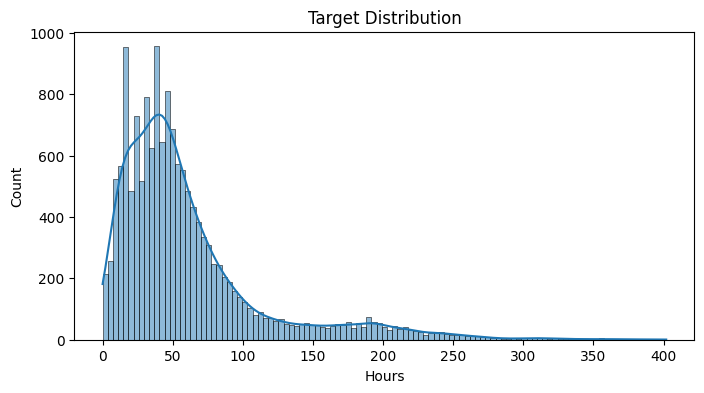

In [7]:
# --- 5. Target Variable Distribution (replace 'target' with actual column) ---
plt.figure(figsize=(8,4))
sns.histplot(df['Hours'], kde=True)
plt.title('Target Distribution')
plt.show()

In [8]:
# --- 6. Categorical Feature Analysis ---
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Date:
Date
2025-05-02    10
2025-04-30    10
2025-04-29    10
2025-04-28    10
2019-07-04    10
              ..
2025-03-16     1
2019-09-08     1
2019-08-18     1
2019-07-14     1
2019-08-25     1
Name: count, Length: 1806, dtype: int64


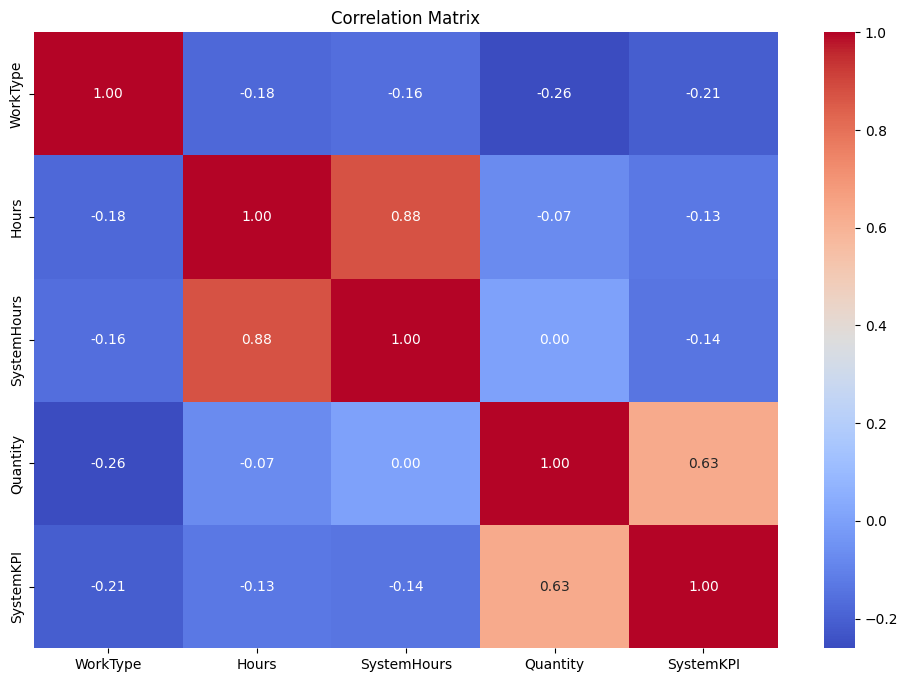

In [9]:
# --- 7. Correlation Matrix ---
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

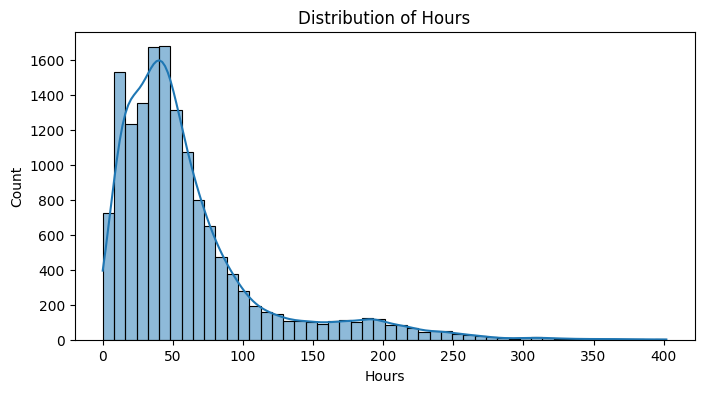

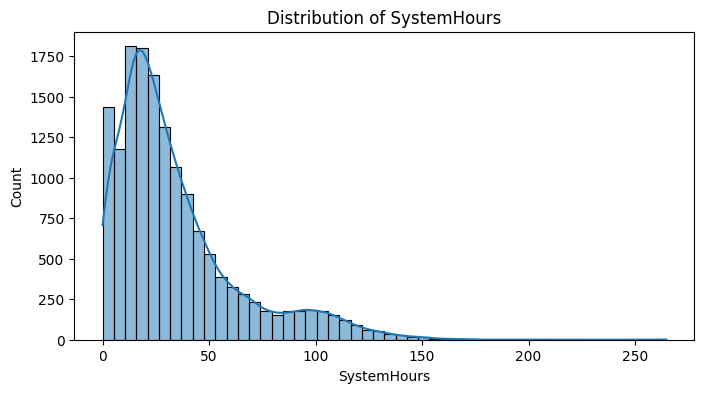

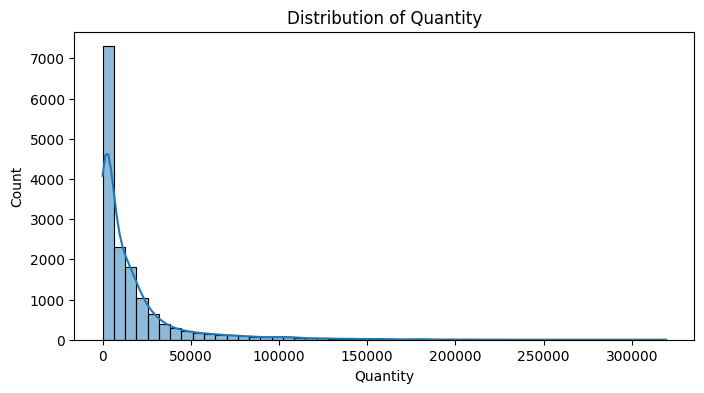

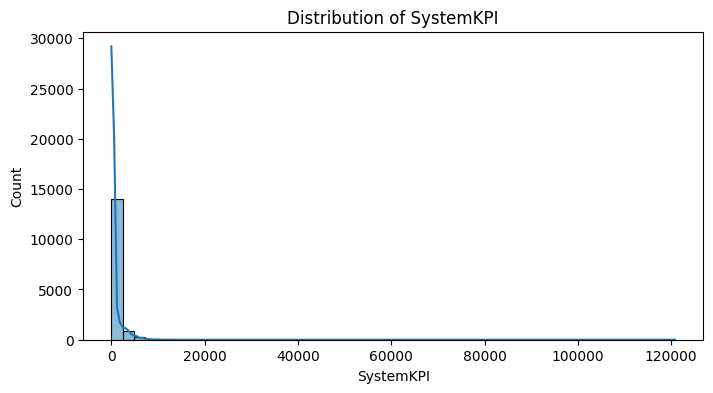

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

# --- 6. Visualize distributions of numeric columns ---
num_cols = ['Hours', 'SystemHours', 'Quantity', 'SystemKPI']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

In [11]:
# --- 4. Missing Values ---
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Date           0
WorkType       0
Hours          0
SystemHours    0
Quantity       0
SystemKPI      0
dtype: int64


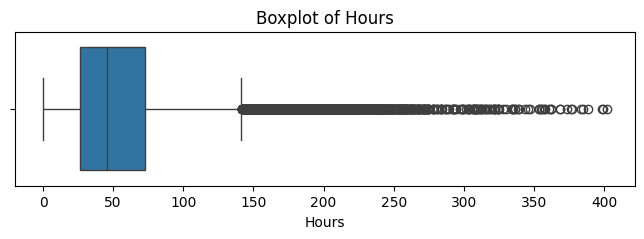

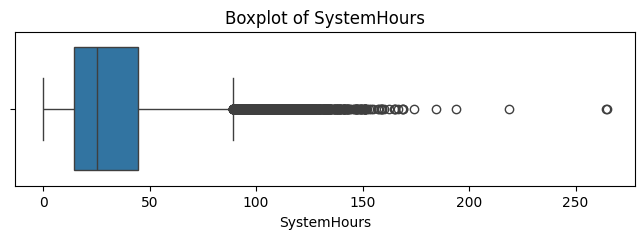

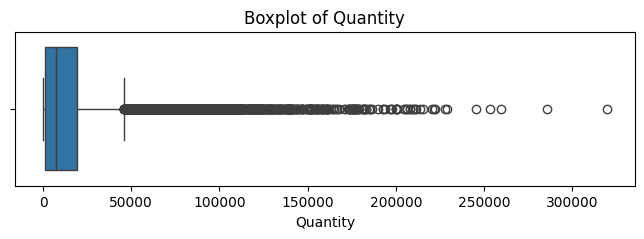

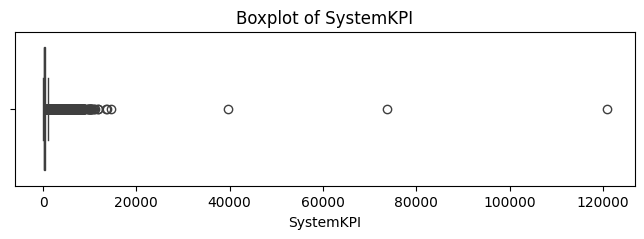

In [12]:
# --- 7. Boxplots to check for outliers ---
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [14]:
# --- 8. Grouped statistics by WorkType ---
grouped = df.groupby('WorkType')[num_cols].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
display(grouped)
grouped.to_csv('grouped_statistics_by_worktype.csv')


Hours                                          SystemHours  \
                mean   median        std    min     max count        mean   
WorkType                                                                    
202        16.545048   16.000   6.286581   0.82   40.97  1468   15.704973   
203        41.507804   40.500   9.504050  12.09   81.90  1471   21.813098   
206       168.508722  174.580  69.043968   5.08  401.90  1799   85.735909   
209        70.370251   61.910  35.125966   1.18  312.21  1473   46.711731   
210        59.110000   54.085  29.355057   0.03  278.82  1508   45.601314   
211        79.111917   77.120  29.497032   2.37  229.59  1544   22.748476   
213        24.983476   21.480  14.835543   1.20  102.07  1470    6.580894   
214        42.760545   40.200  17.825386   2.82  114.99  1486   26.016228   
215        48.680900   46.700  26.377258   0.93  237.28  1634   38.778419   
217        29.810658   25.480  19.057395   0.17  114.05  1353   19.187251   

                                          ...      Quantity                    \
             median        std       min  ...           std     min       max   
WorkType                                  ...                                   
202       14.916389   5.489829  1.240555  ...   2244.524733   100.0   20615.0   
203       21.712222   6.446916  0.998055  ...  43375.593492  2766.0  319567.0   
206       90.595555  30.822083  0.151944  ...    377.124983     5.0    2580.0   
209       41.894444  23.813630  0.023611  ...   8208.536056     0.0   76595.0   
210       40.809167  24.329784  0.014722  ...   7001.249585     0.0   67338.0   
211       18.466944  18.077443  0.000555  ...   4502.029505     3.0   72710.0   
213        3.678472   8.219359  0.000833  ...    511.865611     2.0    4944.0   
214       24.611666  12.503822  0.576666  ...  20854.264301  1410.0  221988.0   
215       37.106388  21.972546  0.580833  ...   8442.435220   172.0   69477.0   
217       15.555000  13.976763  0.006388  ...   3743.820025     2.0   72456.0   

                  SystemKPI                                        \
         count         mean       median          std         min   
WorkType                                                            
202       1468   229.780256   213.734129    98.112059   21.625521   
203       1471  3556.347136  3231.152796  1763.573346  306.893964   
206       1799    10.950835    10.663612     2.339284    3.592105   
209       1473   425.543270   396.142089   360.610083    0.000000   
210       1508   323.005390   316.667744    65.648665    0.000000   
211       1544   494.769583   281.524450  3759.080426   29.626252   
213       1470   147.104705   128.994169   134.859846    6.442377   
214       1486  1320.759838  1087.755026   876.216961  361.293953   
215       1634   392.111052   376.249043   100.741515  103.964646   
217       1353   161.225618    96.723935   274.696873    2.457338   

                               
                    max count  
WorkType                       
202         1336.701203  1468  
203        13679.367260  1471  
206           32.906860  1799  
209        13516.911471  1473  
210         1127.185527  1508  
211       120830.301405  1544  
213         3601.440576  1470  
214        14543.492209  1486  
215         1129.214551  1634  
217         4901.471334  1353  

[10 rows x 24 columns]

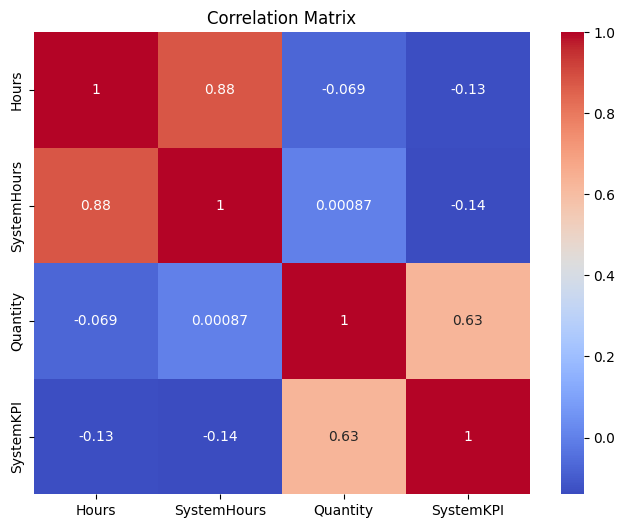

In [40]:
# --- 9. Correlation matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


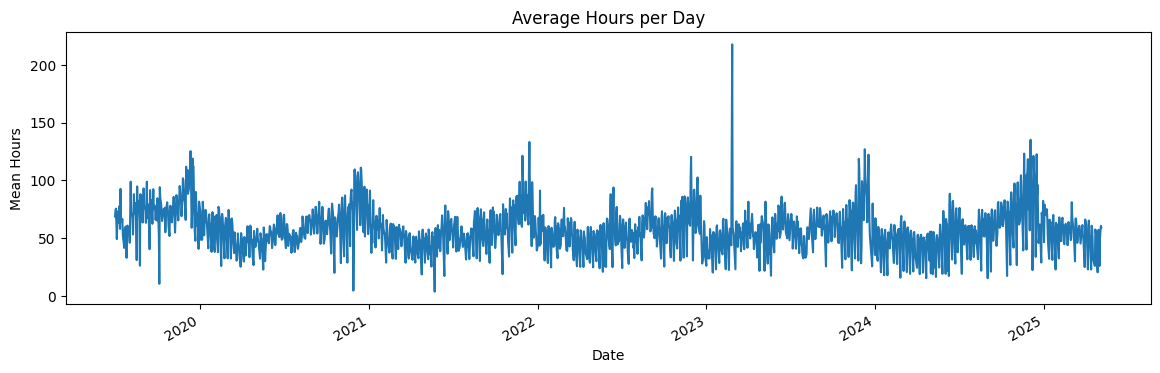

In [41]:
# --- 10. Time trends: mean Hours per day ---
daily_hours = df.groupby('Date')['Hours'].mean()
plt.figure(figsize=(14, 4))
daily_hours.plot()
plt.title('Average Hours per Day')
plt.ylabel('Mean Hours')
plt.xlabel('Date')
plt.show()

In [12]:
for col in ['Hours', 'SystemHours', 'Quantity', 'SystemKPI']:
    df[f'log_{col}'] = np.log1p(df[col])

In [43]:
df.head()

,Date,WorkType,Hours,SystemHours,Quantity,SystemKPI,log_Hours,log_SystemHours,log_Quantity,log_SystemKPI
0,2019-07-01,203,40.20,19.720555,84443.0,4281.978879,3.718438,3.031126,11.343844,8.362404
1,2019-07-01,206,251.90,108.213611,1049.0,9.693790,5.532994,4.693306,6.956545,2.369663
2,2019-07-01,202,16.00,15.108611,2106.0,139.390709,2.833213,2.779354,7.653020,4.944429
3,2019-07-01,211,48.76,24.848333,2413.0,97.109130,3.907211,3.252246,7.789040,4.586080
4,2019-07-01,213,30.01,0.116666,15.0,128.572163,3.434310,0.110347,2.772589,4.864238


In [58]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'] >= 5

In [ ]:
# df = pd.get_dummies(df, columns=['WorkType'])

In [59]:
df.head()

,Date,WorkType,Hours,SystemHours,Quantity,SystemKPI,Year,Month,DayOfWeek,IsWeekend
0,2019-07-01,203,40.20,19.720555,84443.0,4281.978879,2019,7,0,False
1,2019-07-01,206,251.90,108.213611,1049.0,9.693790,2019,7,0,False
2,2019-07-01,202,16.00,15.108611,2106.0,139.390709,2019,7,0,False
3,2019-07-01,211,48.76,24.848333,2413.0,97.109130,2019,7,0,False
4,2019-07-01,213,30.01,0.116666,15.0,128.572163,2019,7,0,False


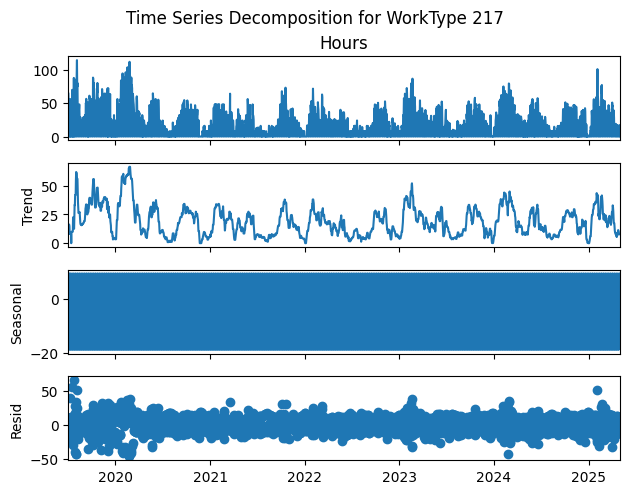

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Choose a WorkType, e.g., 202
wt = 217

df_wt = df[df['WorkType'] == wt].copy()
df_wt = df_wt.set_index('Date').sort_index()
df_wt.index = pd.to_datetime(df_wt.index)

# Aggregate by date (mean or sum as appropriate)
ts = df_wt['Hours'].resample('D').mean().fillna(0)

# Decompose
result = seasonal_decompose(ts, model='additive', period=7)  # period=7 for weekly seasonality

result.plot()
plt.suptitle(f'Time Series Decomposition for WorkType {wt}', y=1.02)
plt.show()

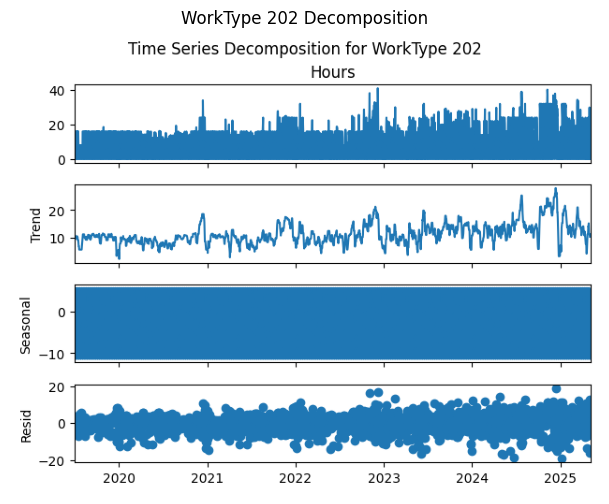

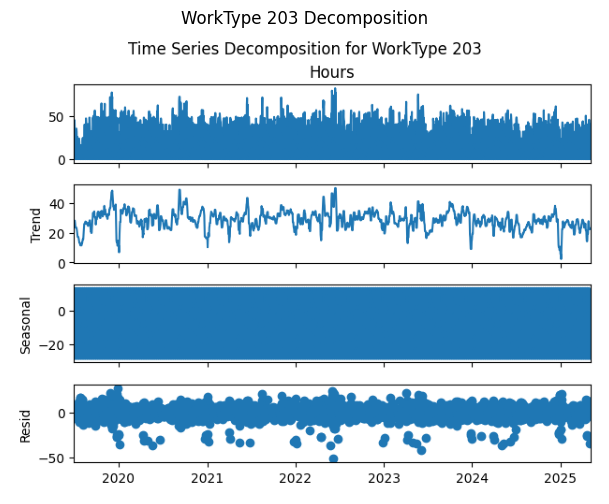

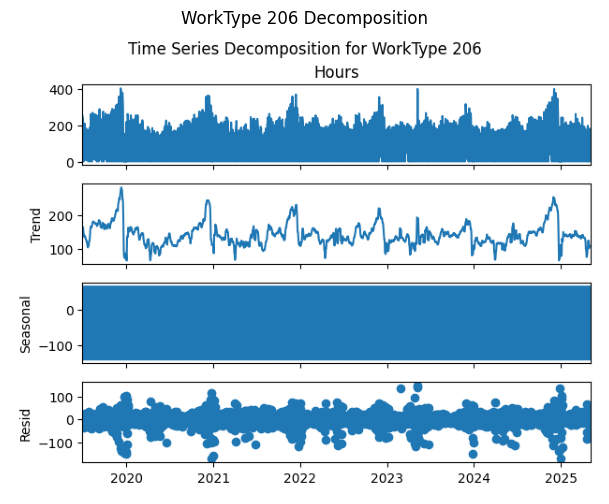

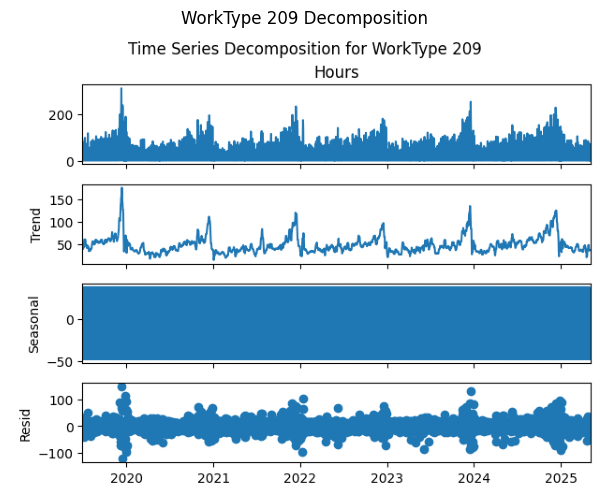

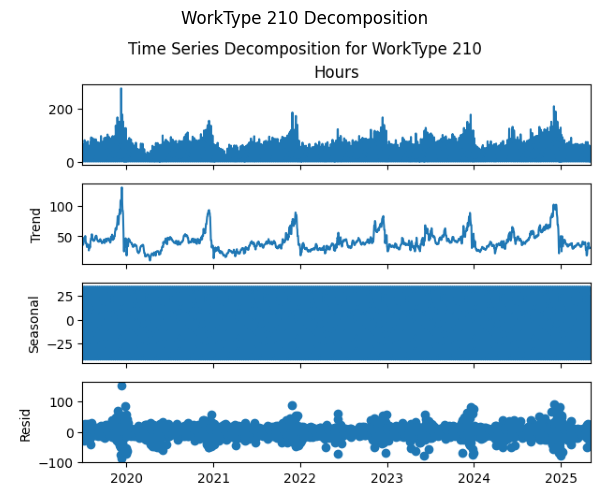

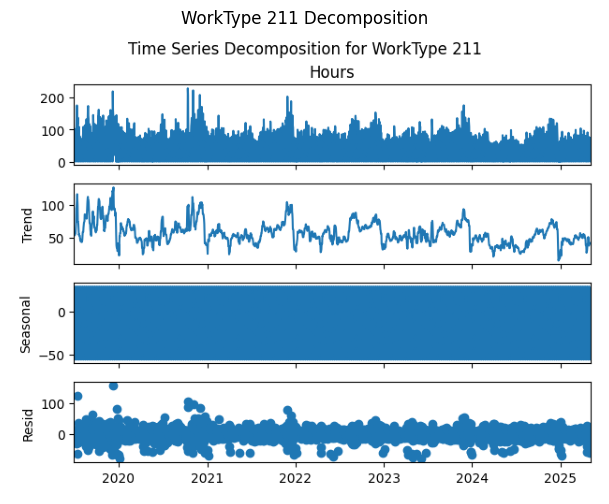

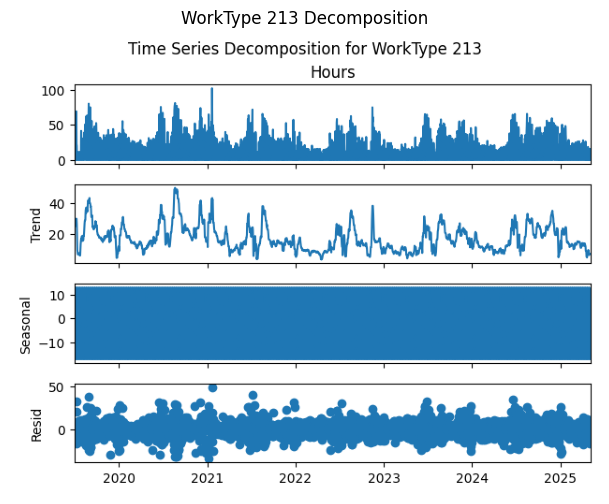

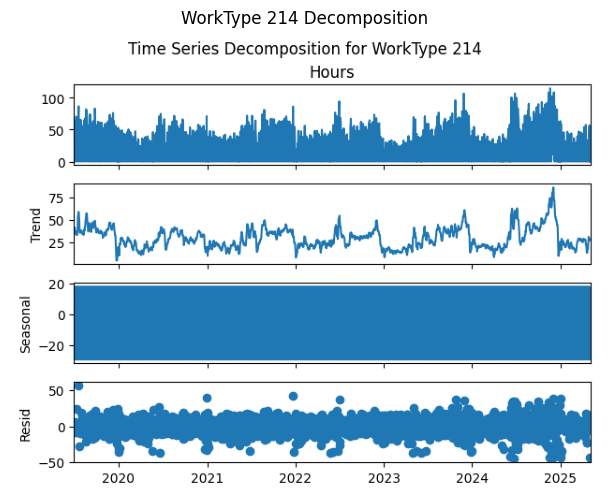

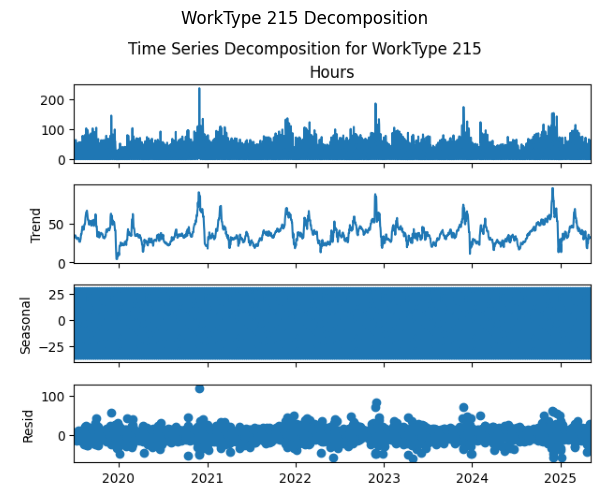

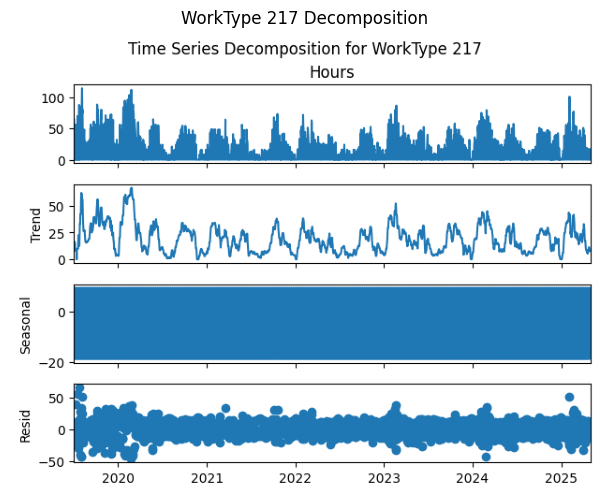

In [73]:
import matplotlib.pyplot as plt
import os

eda_dir = r"c:\forlogssystems\work_utilization_app\EDA"
for wt in [202, 203, 206, 209, 210, 211, 213, 214, 215, 217]:
    img_path = os.path.join(eda_dir, f"{wt}_decomposition.png")
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        plt.figure(figsize=(10,6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"WorkType {wt} Decomposition")
        plt.show()

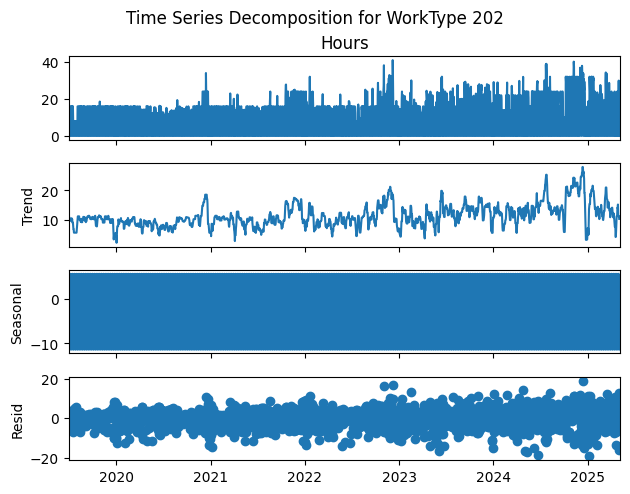

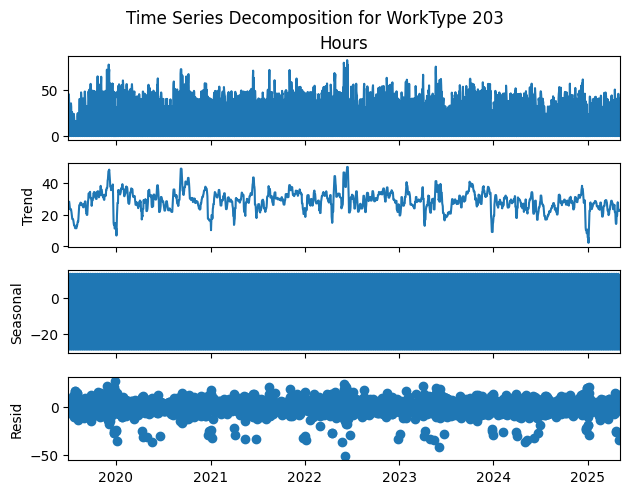

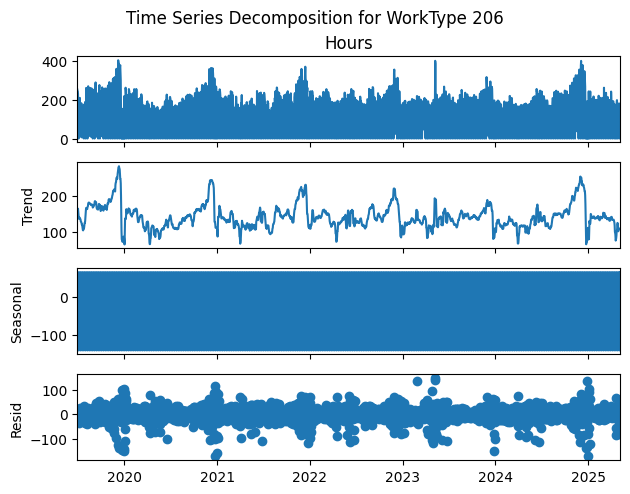

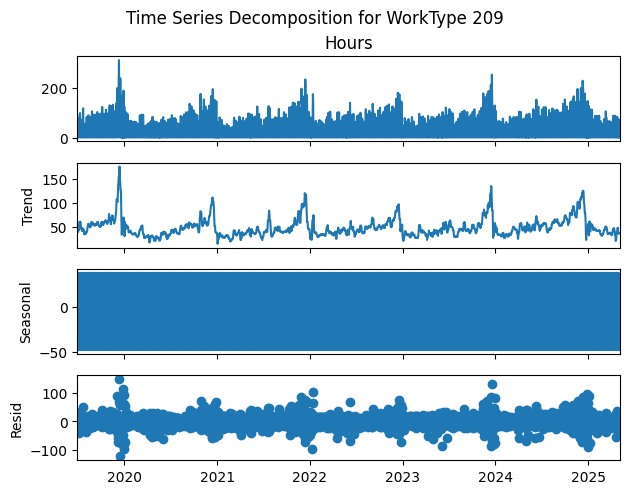

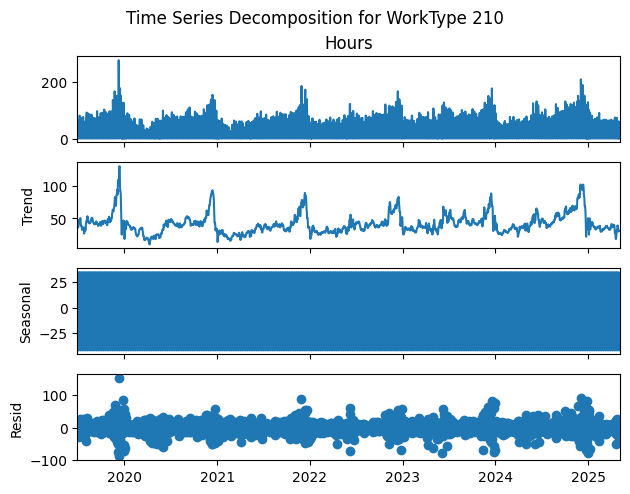

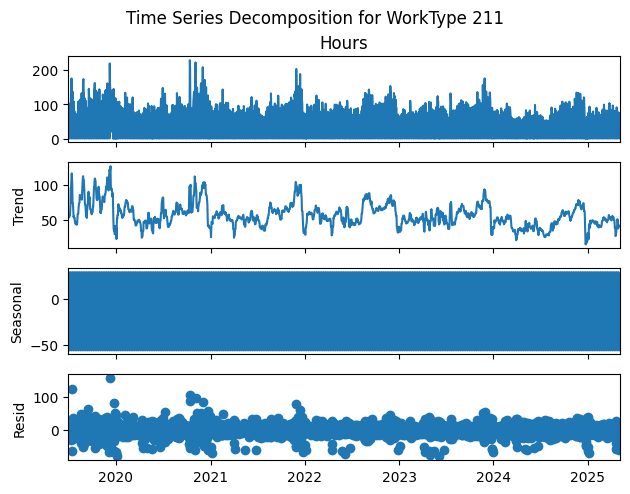

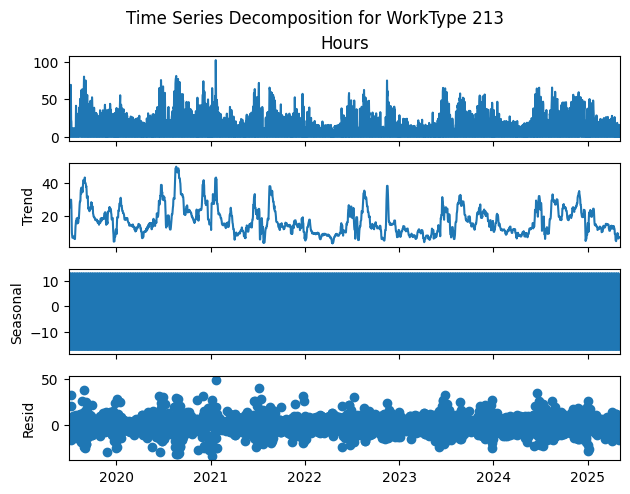

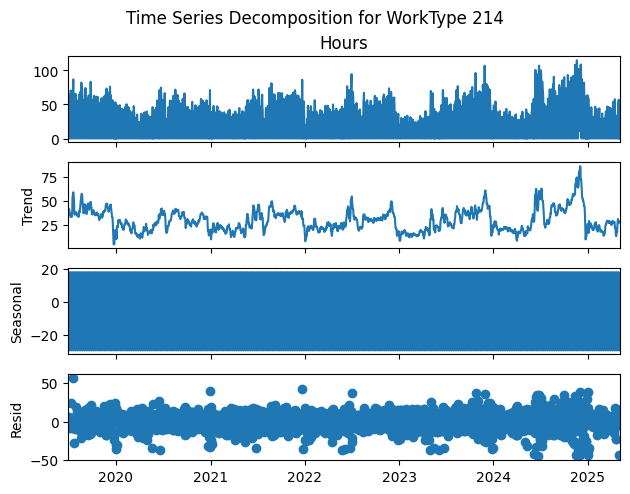

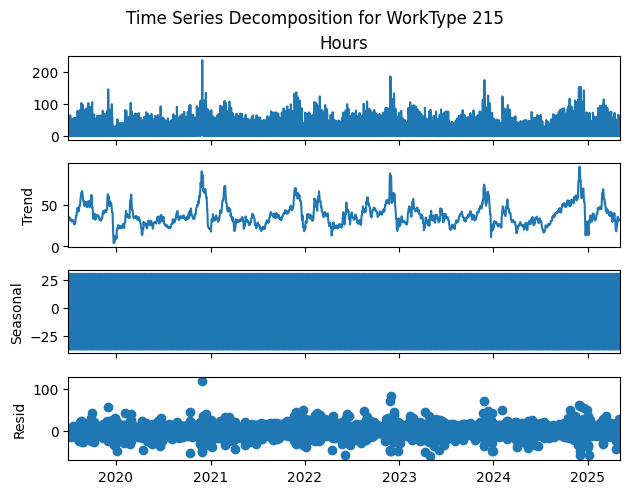

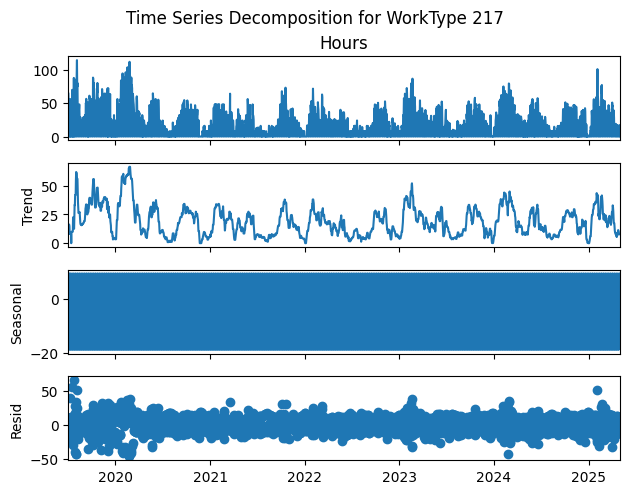

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

for wt in [202, 203, 206, 209, 210, 211, 213, 214, 215, 217]:
    df_wt = df[df['WorkType'] == wt].copy()
    df_wt = df_wt.set_index('Date').sort_index()
    ts = df_wt['Hours'].resample('D').mean().fillna(0)  # Fill missing days with 0

    result = seasonal_decompose(ts, model='additive', period=7)
    result.plot()
    plt.suptitle(f'Time Series Decomposition for WorkType {wt}', y=1.02)
    plt.show()

In [17]:
# --- LightGBM with log-transformed features and target for WorkType 206 ---

import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import matplotlib.pyplot as plt

In [18]:
# Filter for WorkType 206 and set up
df_206 = df[df['WorkType'] == 206].copy()
df_206['Date'] = pd.to_datetime(df_206['Date'])
df_206 = df_206.set_index('Date').sort_index()
df_206.head(100)

,WorkType,Hours,SystemHours,Quantity,SystemKPI
Date,,,,,
2019-07-01,206,251.90,108.213611,1049.0,9.693790
2019-07-02,206,243.87,136.735000,1095.0,8.008191
2019-07-03,206,242.83,168.947500,1094.0,6.475384
2019-07-04,206,227.00,123.256111,855.0,6.936776
2019-07-05,206,108.97,39.269722,332.0,8.454351
...,...,...,...,...,...
2019-10-13,206,76.00,37.373333,497.0,13.298252
2019-10-14,206,226.10,81.630000,1058.0,12.960921
2019-10-15,206,236.97,119.303888,1137.0,9.530285


In [19]:
df_206 = df_206.resample('D').asfreq()
for col in ['Hours', 'SystemHours', 'Quantity', 'SystemKPI']:
    df_206[col] = df_206[col].fillna(0)
    df_206[f'log_{col}'] = np.log1p(df_206[col])

In [20]:
# Time-based features
df_206['Year'] = df_206.index.year
df_206['Month'] = df_206.index.month
df_206['DayOfWeek'] = df_206.index.dayofweek
# Sunday (6) to Friday (4) are working days, Saturday (5) is not
df_206['IsWorkingDay'] = df_206['DayOfWeek'].isin([6, 0, 1, 2, 3, 4]).astype(int)


In [22]:
# Features and target (log-transformed)
features = ['log_SystemHours', 'log_Quantity', 'log_SystemKPI', 'Year', 'Month', 'DayOfWeek', 'IsWorkingDay']
target = 'log_Hours'
X = df_206[features]
y = df_206[target]

c:\forlogssystems\work_utilization_app\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\forlogssystems\work_utilization_app\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\amila.g\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\amila.g\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 356, number of used features: 7
[LightGBM] [Info] Start training from score 4.272091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

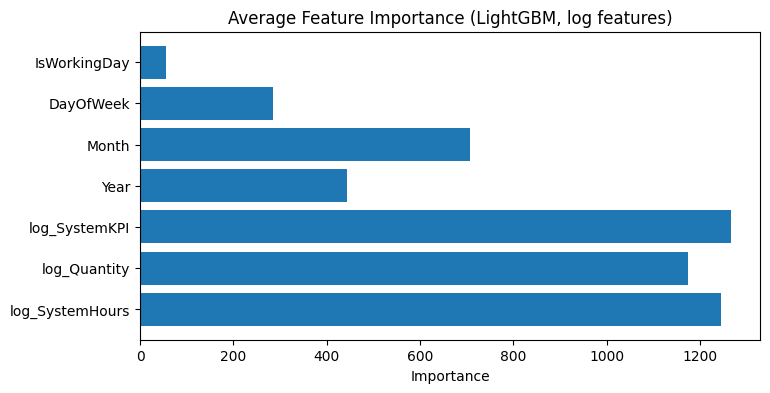

In [23]:
# TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []
feature_importances = np.zeros(len(features))

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model = lgb.LGBMRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Inverse log1p for interpretation
    y_true = np.expm1(y_test)
    mae = mean_absolute_error(y_true, y_pred)
    mae_scores.append(mae)
    feature_importances += model.feature_importances_
    print(f"Fold {fold+1} MAE: {mae:.2f}")

print(f"\nAverage MAE across folds: {np.mean(mae_scores):.2f}")

# Feature importance plot
feature_importances /= tscv.get_n_splits()
plt.figure(figsize=(8,4))
plt.barh(features, feature_importances)
plt.title("Average Feature Importance (LightGBM, log features)")
plt.xlabel("Importance")
plt.show()

In [28]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import lightgbm as lgb

# Combine X and y for feature engineering
Xy = X.copy()
Xy['log_Hours'] = y

def add_time_features(df):
    df = df.copy()
    df['log_Hours_lag1'] = df['log_Hours'].shift(1).fillna(0)
    df['log_Hours_roll7'] = df['log_Hours'].rolling(7).mean().fillna(0)
    return df

feature_engineering = FunctionTransformer(add_time_features)

selected_features = [
    'log_SystemHours', 'log_Quantity', 'log_SystemKPI', 'Year', 'Month', 'DayOfWeek', 'IsWorkingDay',
    'log_Hours_lag1', 'log_Hours_roll7'
]

def select_features(df):
    return df[selected_features]

pipeline = Pipeline([
    ('feature_eng', feature_engineering),
    ('select', FunctionTransformer(select_features)),
    ('model', lgb.LGBMRegressor(n_estimators=200, random_state=42))
])

# Fit pipeline (pass Xy, use y as target)
pipeline.fit(Xy, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 2136, number of used features: 9
[LightGBM] [Info] Start training from score 4.232757


Pipeline(steps=[('feature_eng',
                 FunctionTransformer(func=<function add_time_features at 0x00000204F641D580>)),
                ('select',
                 FunctionTransformer(func=<function select_features at 0x00000204F641DBC0>)),
                ('model', LGBMRegressor(n_estimators=200, random_state=42))])

In [29]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Model Evaluation with TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=5)
mae_scores = -cross_val_score(pipeline, Xy, y, cv=tscv, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-cross_val_score(pipeline, Xy, y, cv=tscv, scoring='neg_mean_squared_error'))
print(f"MAE scores: {mae_scores}")
print(f"Average MAE: {mae_scores.mean():.2f}")
print(f"RMSE scores: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean():.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 356, number of used features: 9
[LightGBM] [Info] Start training from score 4.272091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 2136, number of used features: 9
[LightGBM] [Info] Start training from score 4.232757


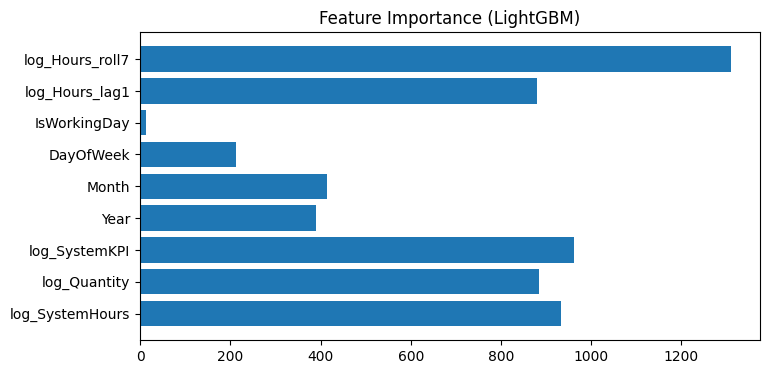

In [31]:
# 2. Feature Importance & Diagnostics
pipeline.fit(Xy, y)
model = pipeline.named_steps['model']
importances = model.feature_importances_
plt.figure(figsize=(8,4))
plt.barh(selected_features, importances)
plt.title("Feature Importance (LightGBM)")
plt.show()

In [32]:
param_grid = {
    'model__num_leaves': [15, 31, 63],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [100, 200]
}
grid = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(Xy, y)
print("Best params:", grid.best_params_)
print("Best MAE:", -grid.best_score_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 2136, number of used features: 9
[LightGBM] [Info] Start training from score 4.232757
Best params: {'model__learning_rate': 0.05, 'model__n_estimators': 200, 'model__num_leaves': 15}
Best MAE: 0.08755898303372978


In [35]:
split_idx = int(len(Xy) * 0.9)
Xy_train, Xy_test = Xy.iloc[:split_idx], Xy.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

pipeline.fit(Xy_train, y_train)
y_pred_log = pipeline.predict(Xy_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

print("Validation MAE:", mean_absolute_error(y_true, y_pred))
print("Validation RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("Validation R2:", r2_score(y_true, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1304
[LightGBM] [Info] Number of data points in the train set: 1922, number of used features: 9
[LightGBM] [Info] Start training from score 4.229754
Validation MAE: 13.594165934218125
Validation RMSE: 20.738679060949945
Validation R2: 0.9566041655002503


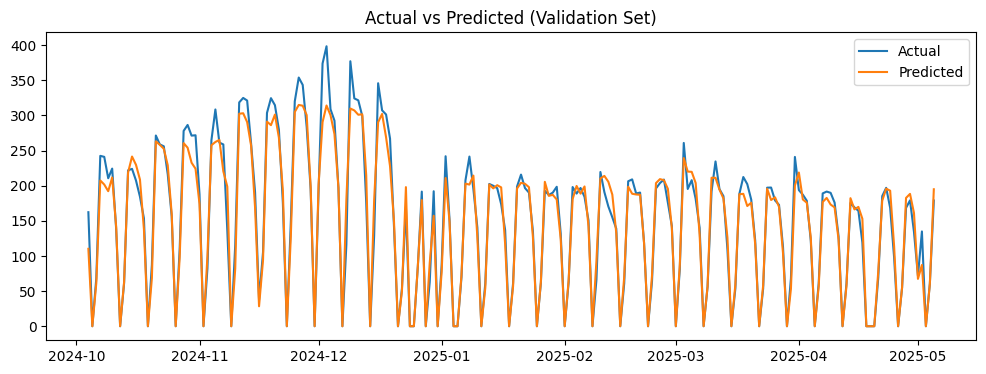

In [37]:
plt.figure(figsize=(12,4))
plt.plot(y_true.index, y_true, label='Actual')
plt.plot(y_true.index, y_pred, label='Predicted')  # Use y_true's index for both
plt.legend()
plt.title("Actual vs Predicted (Validation Set)")
plt.show()